<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h2> TASK 1 : Become familiar with the dataset </h2>

<h3> 1.1) Viewing the first five rows of the data </h3>

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<h3> 1.2) Describing the data </h3>

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<h2> TASK 2 : Generative Descriptive Statistics and Visualizations </h2>

<h3> 2.1) Boxplot for median values of owner occupied homes </h3>

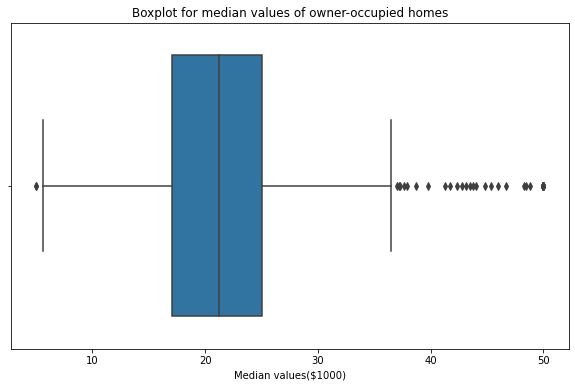

In [8]:
pyplot.figure(figsize=(10,6))
ax = sns.boxplot(x='MEDV', data = boston_df)
pyplot.title("Boxplot for median values of owner-occupied homes")
pyplot.xlabel("Median values($1000)")
pyplot.show()

<h3> 2.2) Barplot for Charles river table </h3>

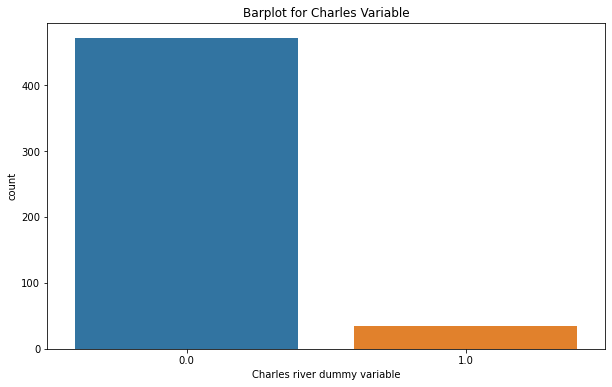

In [9]:
pyplot.figure(figsize=(10,6))
ax = sns.countplot(x='CHAS', data = boston_df)
pyplot.title("Barplot for Charles Variable")
pyplot.xlabel("Charles river dummy variable")
pyplot.show()

<h3> 2.3) Boxplot for MEDV vs AGE </h3>

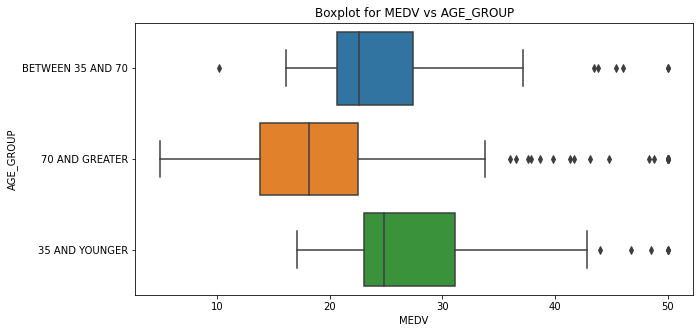

In [11]:
boston_df.loc[(boston_df['AGE']<=35), "AGE_GROUP"] = "35 AND YOUNGER"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), "AGE_GROUP"] = "BETWEEN 35 AND 70"
boston_df.loc[(boston_df['AGE']>=70), "AGE_GROUP"] = "70 AND GREATER"
pyplot.figure(figsize=(10,5))
ax = sns.boxplot(x='MEDV', y='AGE_GROUP', data=boston_df)
pyplot.title("Boxplot for MEDV vs AGE_GROUP")
pyplot.xlabel("MEDV")
pyplot.ylabel("AGE_GROUP")
pyplot.show()

<h3> 2.4) Scatterplot for NOX vs INDUS </h3>

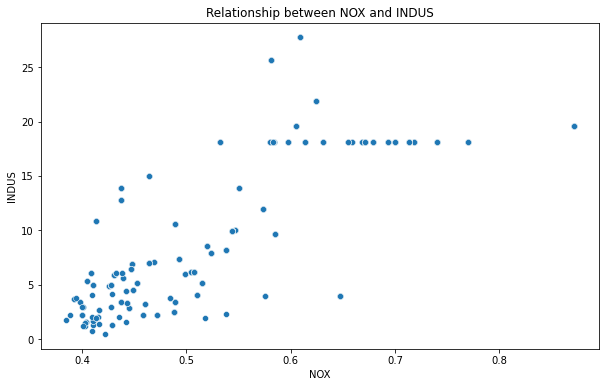

In [12]:
pyplot.figure(figsize=(10,6))
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Relationship between NOX and INDUS")
pyplot.xlabel("NOX")
pyplot.ylabel("INDUS")
pyplot.show()

<h3> 2.5) Histogram for pupil to teacher ratio </h3>

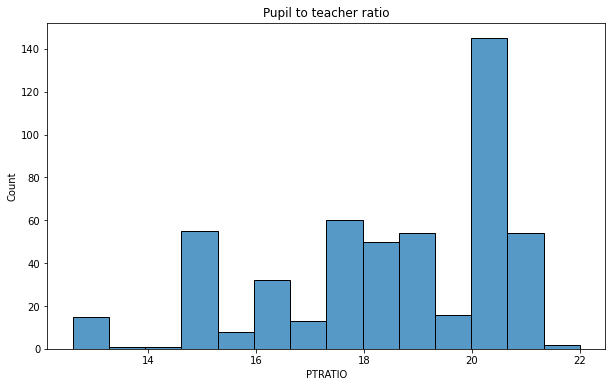

In [13]:
pyplot.figure(figsize=(10,6))
ax = sns.histplot(x='PTRATIO', data=boston_df, kde=False)
pyplot.title("Pupil to teacher ratio")
pyplot.xlabel("PTRATIO")
pyplot.show()

<h2> TASK 3 : Use appropriate tests to answer the questions provided </h2>

<h3> 3.1) T-test for Charles variable </h3>
<h4> Null Hypothesis : There is no significant difference in median values of houses bound by the Charles river</h4>
<h4>  Alternative Hypothesis : There is a significant differance  in median values of houses bound by the Charles river</h4>

In [15]:
from scipy import stats
criver_data = boston_df[boston_df['CHAS']==1]['MEDV']
no_criver_data = boston_df[boston_df['CHAS']==0]['MEDV']
t_stat, p_value = stats.ttest_ind(criver_data, no_criver_data)
print(f't_stat: {t_stat} p_value: {p_value}')
if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")                                              

t_stat: 3.996437466090509 p_value: 7.390623170519905e-05
We reject the null hypothesis


<h4> Observation and Conclusion: Since the p-value is less than 0.05, there is no significance difference </h4>

<h3> 3.2) ANOVA test for difference in median values of houses of each proportion of owner-occupied unit built before 1940 </h3>
<h4> Null hypothesis: All houses have the same median values</h4>
<h4>Alternative hypothesis: Atleast one group has a different median value</h4>

In [17]:
model = ols('MEDV  ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


<h4> Observation and Conclusion: As the p-value is less than 0.05, we reject the null hypothesis </h4>

<h3> 3.3) Pearson Correlation test for relationship between NOX and INDUS</h3>
<h4> Null hypothesis: there is no relationship betweeb NOX and INDUS</h4>
<h4> Alternative Hypothesis: There exists a relationship between NOX and INDUS</h4>

In [18]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'corr: {corr} p_value: {p_value}')
if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the numm hypothesis")


corr: 0.7636514469209152 p_value: 7.913361061237794e-98
We reject the null hypothesis


<h4> Observation and Conclusion: The p-value is less than 0.05, so there is no relationship between NOX and INDUS<h4>

<h3> 3.4) Regression analysis for DIS and MEDV</h3>
<h4> Null hypothesis: There is no impact of DIS on MEDV</h4>
<h4> Alternative hypothesis: There is an impact of DIS on MEDV</h4>

In [19]:
y = boston_df['MEDV']
x= boston_df['DIS']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        00:16:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4> Observation and Conclusion: we reject the null hypothesis, So there is an impact of DIS on MEDV</h4>